<a href="https://colab.research.google.com/github/alessandrossC/bank_deposit/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import opendatasets as od
from matplotlib.ticker import PercentFormatter

In [5]:
# Download the dataset
od.download("https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: oleksandrchekoi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv


100%|██████████| 391k/391k [00:00<00:00, 519MB/s]

In [8]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Check for null values
df.isnull().values.any()

np.False_

In [59]:
target_col = 'y'

print("🔍 Percentage of each class in target column:")
class_distribution = df[target_col].value_counts(normalize=True) * 100
print(class_distribution)

🔍 Percentage of each class in target column:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


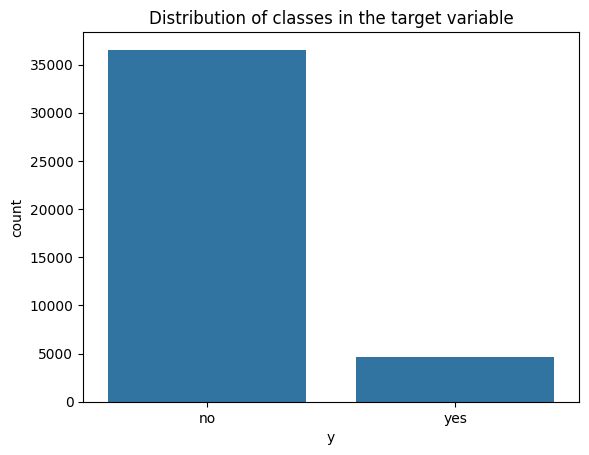

In [60]:
sns.countplot(x=target_col, data=df)
plt.title("Distribution of classes in the target variable")
plt.show()

In [17]:
# Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:")
print(numerical_features.tolist())

Numerical Features:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


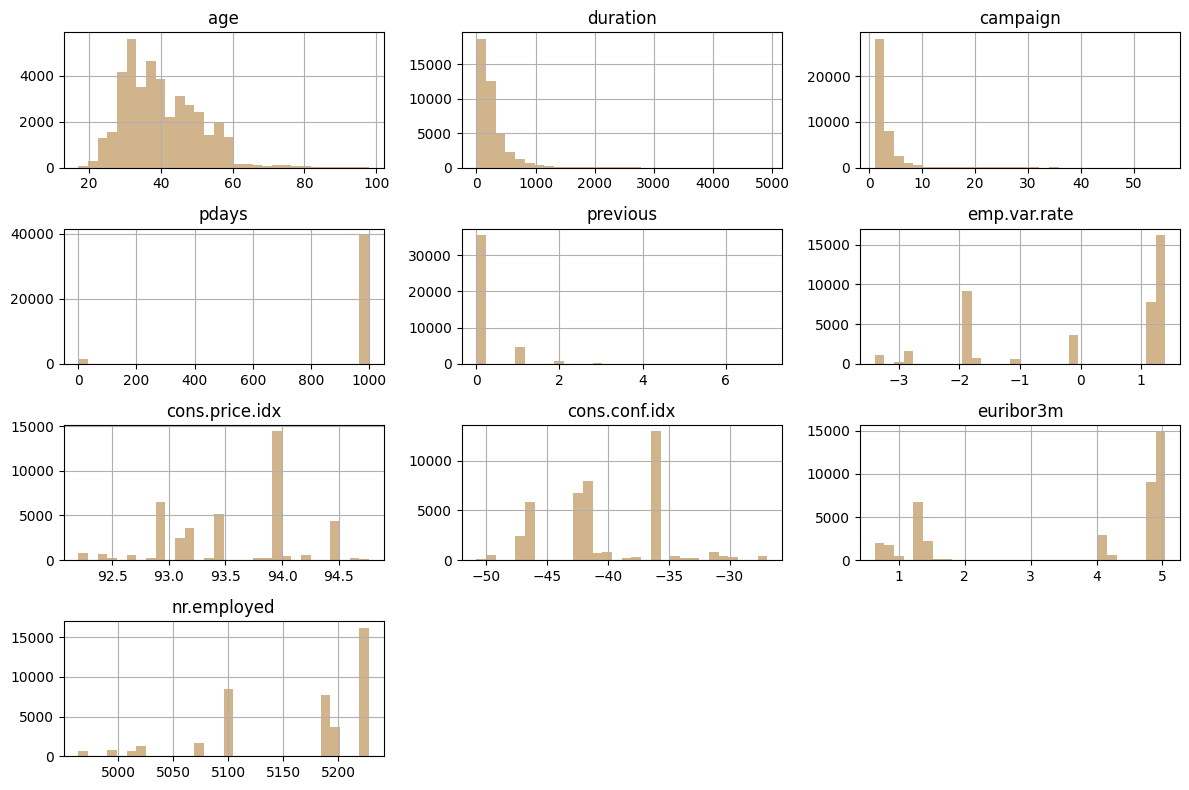

In [20]:
# Plot histograms for all numerical features
df[numerical_features].hist(bins=30, figsize=(12, 8), layout=(4, 3), color='tan')
plt.tight_layout()
plt.show()

Think about transforming skewed variables like duration and campaign — for example, using a log transformation or scaling — if their values vary too much.

Check for outliers in age, duration, and pdays. Decide if these unusual values should be removed or handled in a special way.

Look at how economic indicators (like emp.var.rate or cons.price.idx) relate to the target variable y to see if they are helpful for making predictions.

Consider treating pdays and previous as categorical variables instead of numerical ones — they might work better in that format.

In [28]:
# Calculate the outlier range using IQR
def outlier_range(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    num_outliers = ((df[column] < min_value) | (df[column] > max_value)).sum()
    return min_value, max_value, num_outliers

# Return only the upper bound for outliers (useful for filtering)
def outlier_max(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q3 + 1.5 * IQR

# Create a normalized countplot (percent) grouped by a categorical variable
def cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 4)

    title = f'Normalized Distribution of Values by Category: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions * 100).round(2)

    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=ax, title=title)

    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.margins(y=0.15)

    # Add labels above each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}', fontsize=9, rotation=90, padding=3)

# Same as cat_countplot, but filters out outliers in the given numeric column
def cat_countplot_no_outliers(df, column, hue_column):
    max_value = outlier_max(df, column)
    df = df[df[column] <= max_value]
    cat_countplot(df, column, hue_column)

# Normalized countplot sorted by index instead of value count
def cat_countplot_sorted(df, column, hue_column):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 4)

    title = f'Normalized Distribution of Values by Category: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions * 100).round(2)

    ax = proportions.unstack(hue_column).sort_index().plot.bar(ax=ax, title=title)

    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.margins(y=0.15)

    # Add labels above each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}', fontsize=9, rotation=90, padding=3)

# Plot KDE (density curve) for a numeric feature split by target variable
def numeric_kde(data, column):
    df0 = data[data['y'] == 'no']
    df1 = data[data['y'] == 'yes']
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df0[column], label='Not subscribed', cut=0)
    sns.kdeplot(df1[column], label='Subscribed', cut=0)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Same as numeric_kde but removes outliers before plotting
def numeric_kde_no_outliers(data, column):
    max_value = outlier_max(data, column)
    df = data[data[column] <= max_value]
    numeric_kde(df, column)

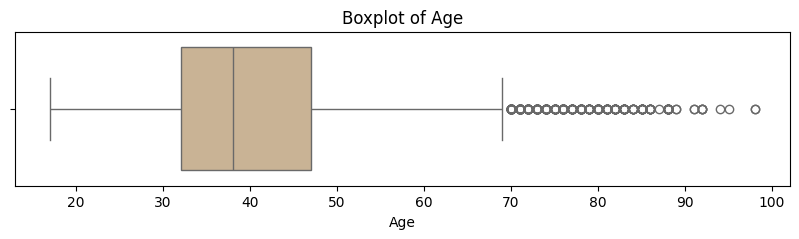

In [22]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['age'], color='tan')
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

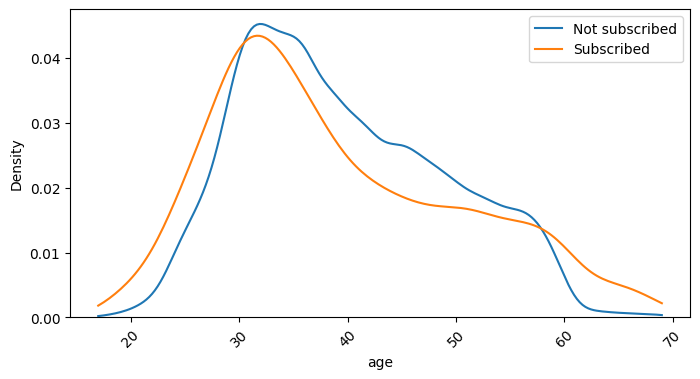

In [30]:
numeric_kde_no_outliers(df, 'age')

Most clients are aged between 30 and 60, with a peak around 35 years old. A few individuals are over 70 — these may be outliers.

Most calls last less than 1000 seconds, with a huge number of short calls under 300 seconds.

There are also extremely long calls over 2000–5000 seconds, which are clear outliers and skew the distribution.

In [23]:
(df['campaign'].value_counts(normalize=True) * 100)[:15]

,proportion
campaign,
1,42.832864
2,25.662814
3,12.967369
4,6.436341
5,3.882199
6,2.376906
7,1.527144
8,0.971157
9,0.687093


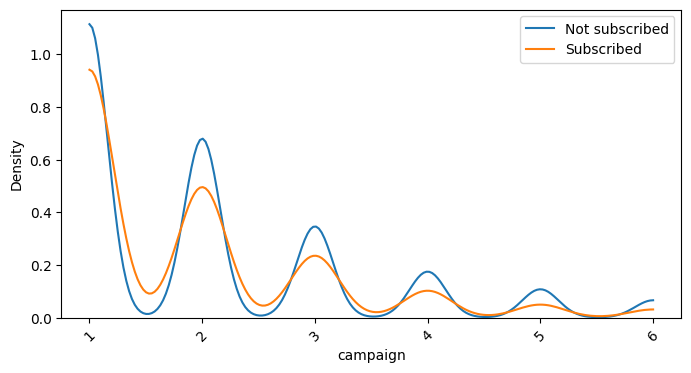

In [32]:
numeric_kde_no_outliers(df, 'campaign')

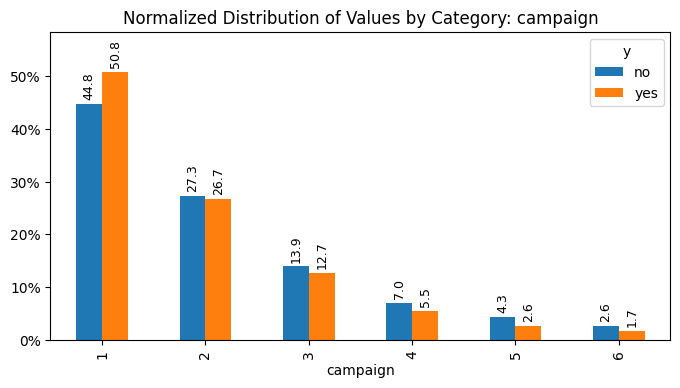

In [38]:
cat_countplot_no_outliers(df, 'campaign', 'y')

Clients who subscribed (yes) mostly received only 1 call — 50.8% of them.
As the number of contacts increases (2, 3, 4+), the subscription rate decreases.

This suggests that the first call is the most effective, while repeated calls reduce the likelihood of success.

In [24]:
(df['pdays'].value_counts(normalize=True) * 100)[:15]

,proportion
pdays,
999,96.321744
3,1.065844
6,1.000291
4,0.286491
9,0.155385
2,0.148101
7,0.145673
12,0.140818
10,0.126250


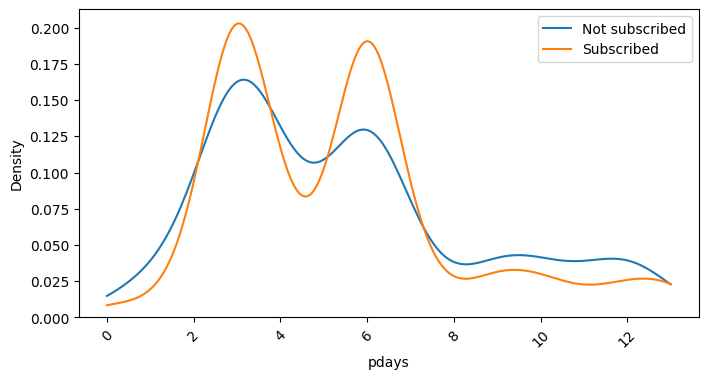

In [42]:
numeric_kde_no_outliers(df[df.pdays != 999], 'pdays')

Subscribed clients (orange line) show two noticeable peaks — around 3–4 and 6 days since last contact.

Compared to non-subscribed clients (blue line), it appears that follow-ups within 3 to 6 days are more likely to result in a subscription.

After 7–8 days, the likelihood of subscription decreases for both groups.

In [43]:
(df['previous'].value_counts(normalize=True) * 100)[:15]

,proportion
previous,
0,86.343110
1,11.073614
2,1.830630
3,0.524425
4,0.169952
5,0.043702
6,0.012139
7,0.002428


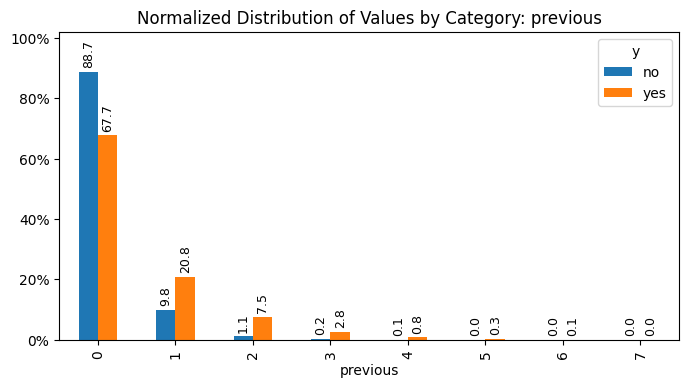

In [45]:
cat_countplot(df, 'previous', 'y')

Most clients had 0 previous contacts — 88.7% among non-subscribers, and 67.7% among subscribers.

Subscription likelihood increases with 1 or 2 previous contacts:

With 1 contact, 20.8% subscribed vs. only 9.8% who didn’t.

With 2 contacts, 7.5% subscribed vs. just 1.1%.

This indicates that past interactions improve the chance of subscription, especially when there were 1–2 previous calls.

In [46]:
(df['emp.var.rate'].value_counts(normalize=True) * 100)

,proportion
emp.var.rate,
1.4,39.414393
-1.8,22.297757
1.1,18.847723
-0.1,8.941925
-2.9,4.037584
-3.4,2.600272
-1.7,1.876760
-1.1,1.541711
-3.0,0.417597


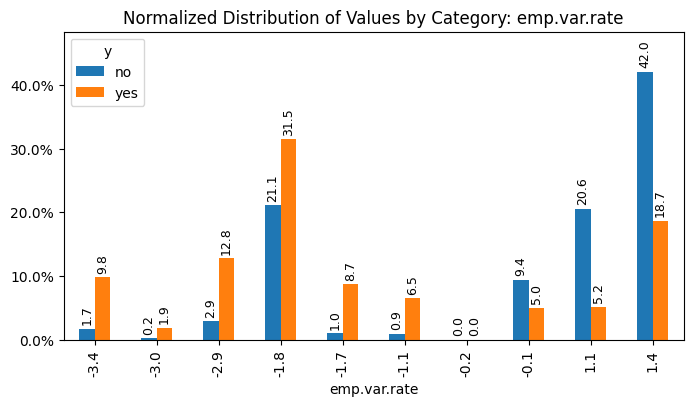

In [47]:
cat_countplot_sorted(df, 'emp.var.rate', 'y')

The highest proportion of subscribers (y = yes) appears when emp.var.rate is negative, especially:

–1.8: 31.5% subscribed (highest)

–2.9: 12.8%

–3.4: 9.8%

For positive values (1.1, 1.4), the majority did not subscribe:

42.0% "no" at 1.4

20.6% "no" at 1.1

This suggests the campaign was more successful during times of economic decline or instability.

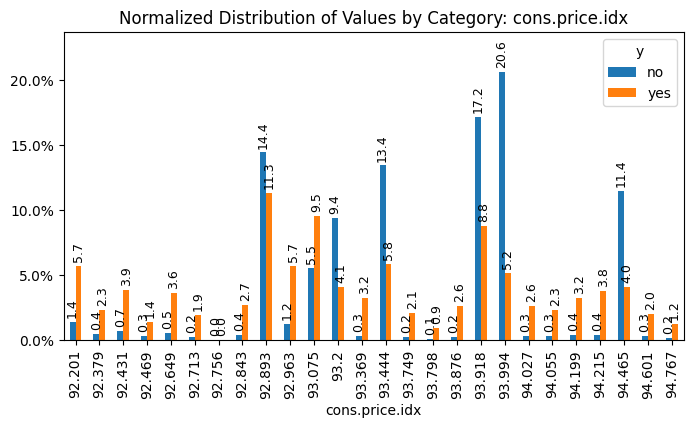

In [48]:
cat_countplot_sorted(df, 'cons.price.idx', 'y')

The highest proportion of subscriptions (yes) occurred at lower consumer price index values, around 92.2–92.9, where the share of yes clearly exceeds no.

In the range of 93.9–94.6, the majority are non-subscribers, with no peaking at 20.6% at 93.994.

This suggests that the campaign was more effective during periods of lower prices/inflation.

In [50]:
df['cons.price.idx_diff'] = (df['cons.price.idx']
                               .diff()
                               .replace(0, np.nan)
                               .ffill()
                               .fillna(0)
                               .round(3))

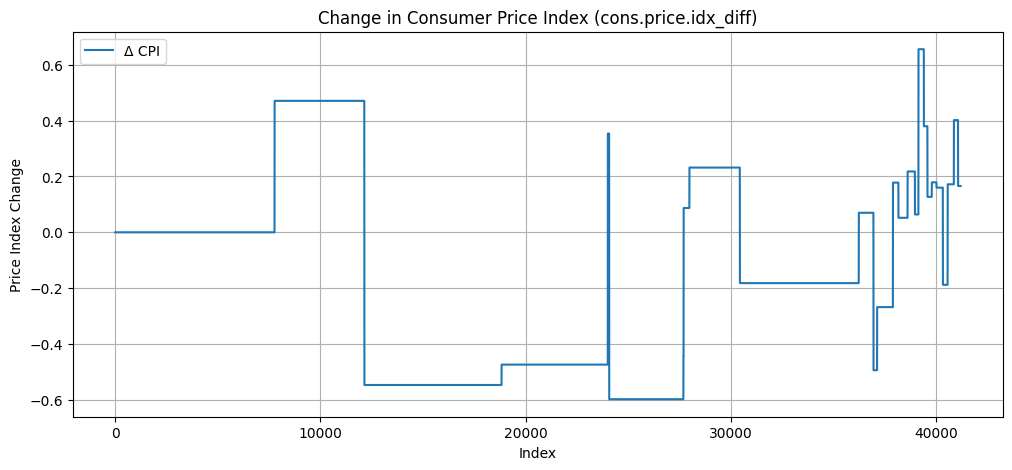

In [51]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x=range(len(df)), y='cons.price.idx_diff', label='Δ CPI')
plt.title("Change in Consumer Price Index (cons.price.idx_diff)")
plt.xlabel("Index")
plt.ylabel("Price Index Change")
plt.grid(True)
plt.legend()
plt.show()


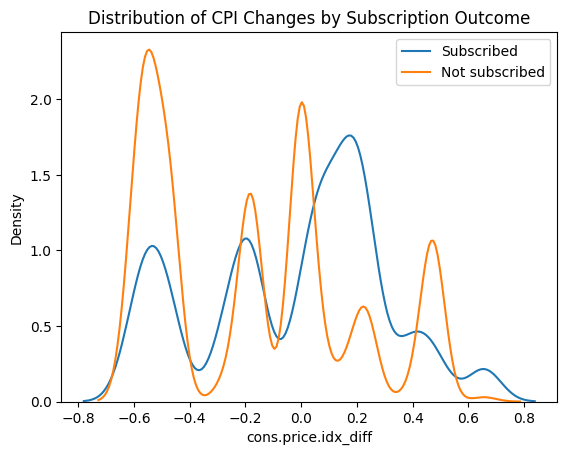

In [52]:
sns.kdeplot(data=df[df['y'] == 'yes'], x='cons.price.idx_diff', label='Subscribed')
sns.kdeplot(data=df[df['y'] == 'no'], x='cons.price.idx_diff', label='Not subscribed')
plt.title("Distribution of CPI Changes by Subscription Outcome")
plt.legend()
plt.show()

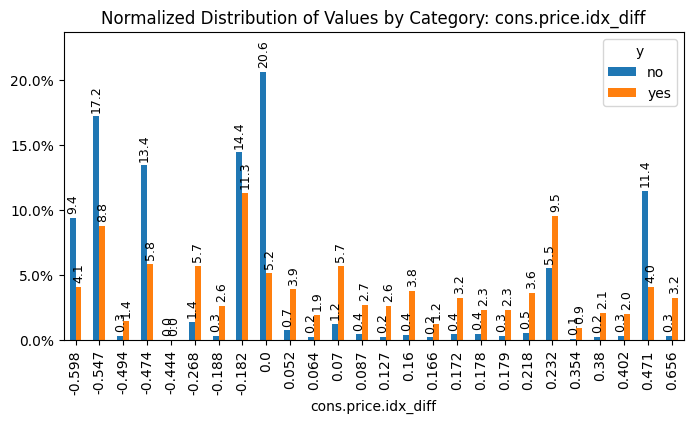

In [55]:
cat_countplot_sorted(df, 'cons.price.idx_diff', 'y')

Subscriptions (yes) are more frequent when the consumer price index slightly increases, especially in the 0.05–0.23 range.

Large negative changes (< -0.2) are associated with more non-subscribers (no), e.g., at -0.547, -0.474, and -0.444.

When the CPI change is zero (0.0) — the highest percentage of non-subscribers (20.6%) — suggesting that economic stability did not favor subscriptions.

📌 This indicates that moderate positive shifts in prices boost campaign effectiveness, while sharp drops or no change at all have less impact.

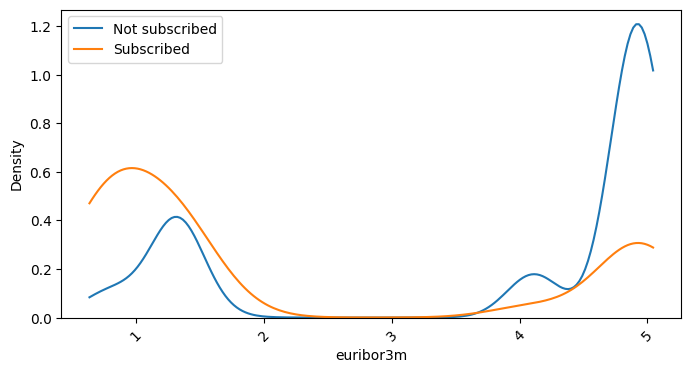

In [56]:
numeric_kde(df, 'euribor3m')

Clients who subscribed are mostly concentrated around euribor3m values below 2.0, suggesting that lower interest rates increased subscription success.

In contrast, non-subscribers are highly concentrated around ~5.0, indicating the campaign was less effective when interest rates were high.

During periods of low Euribor rates (0.5–2.0), the likelihood of subscription was clearly higher.

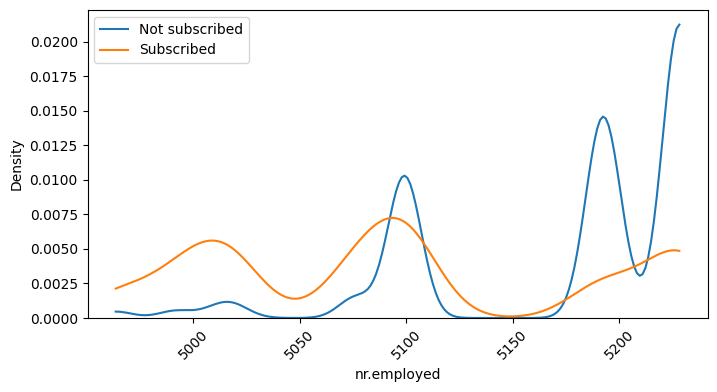

In [58]:
numeric_kde(df, 'nr.employed')

Subscribed clients are more concentrated around lower values of nr.employed, i.e., when the employment level was lower.

Non-subscribers show clear peaks at higher employment values (especially above 5200).

This suggests the campaign was more successful when overall employment was lower, and less effective during strong employment periods.

In [64]:
# Select all categorical columns except the target variable 'y'
cat_cols = df.drop(columns='y').select_dtypes(include='object').columns.tolist()

# Summary statistics of all categorical features
df[cat_cols].describe(include='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


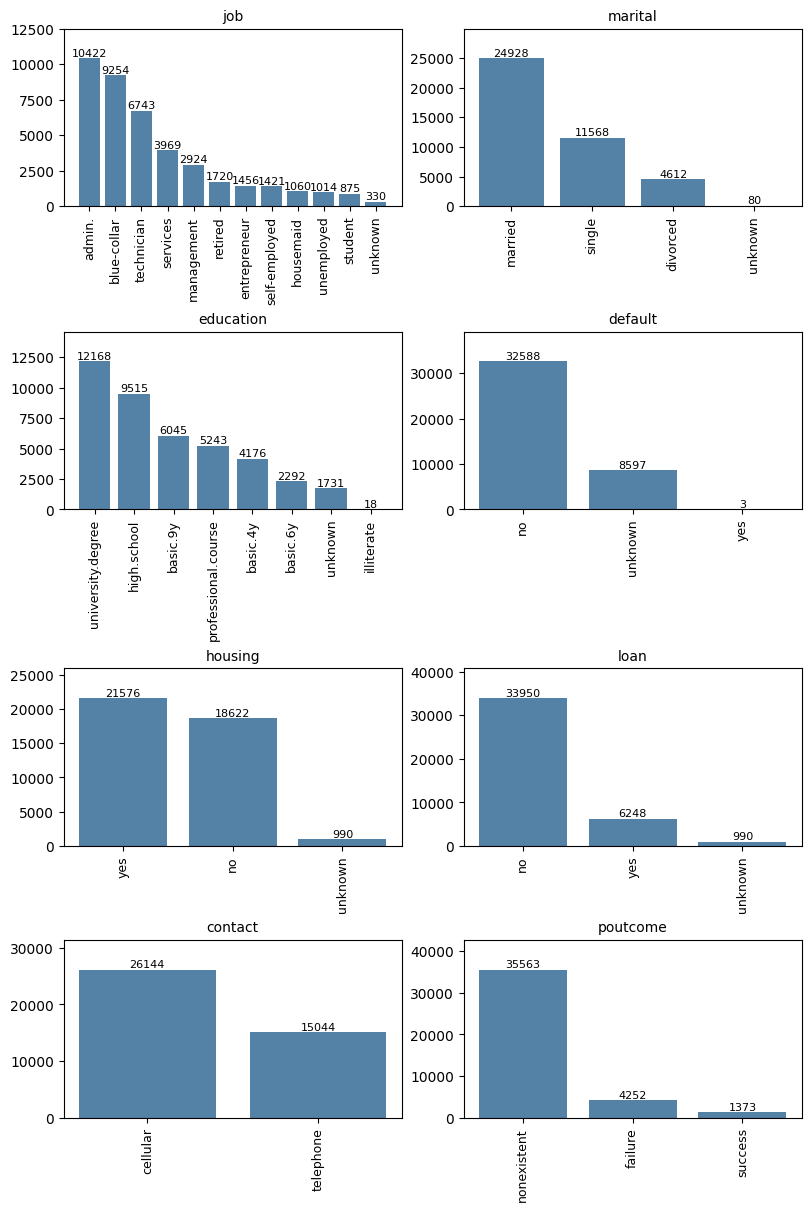

In [68]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set logical order for 'month' and 'day_of_week'
df['month'] = pd.Categorical(
    df['month'],
    ordered=True,
    categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
)

df['day_of_week'] = pd.Categorical(
    df['day_of_week'],
    ordered=True,
    categories=['mon', 'tue', 'wed', 'thu', 'fri']
)

# Select categorical columns (excluding 'y')
cat_cols = df.drop(columns='y').select_dtypes(include='object').columns.tolist()

# Calculate grid size automatically
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

# Create subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 3), layout='constrained')

# Flatten axes for easy iteration
axs = axs.flat if hasattr(axs, 'flat') else [axs]

# Plot countplots with blue bars
for ax, col in zip(axs, cat_cols):
    order = df[col].value_counts().index if col not in ['month', 'day_of_week'] else None
    sns.countplot(x=df[col], color='steelblue', ax=ax, order=order)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.bar_label(ax.containers[0], fontsize=8)
    ax.margins(x=0.05, y=0.2)

# Hide unused axes (if any)
for ax in axs[len(cat_cols):]:
    ax.set_visible(False)

# Show the full plot
plt.show()

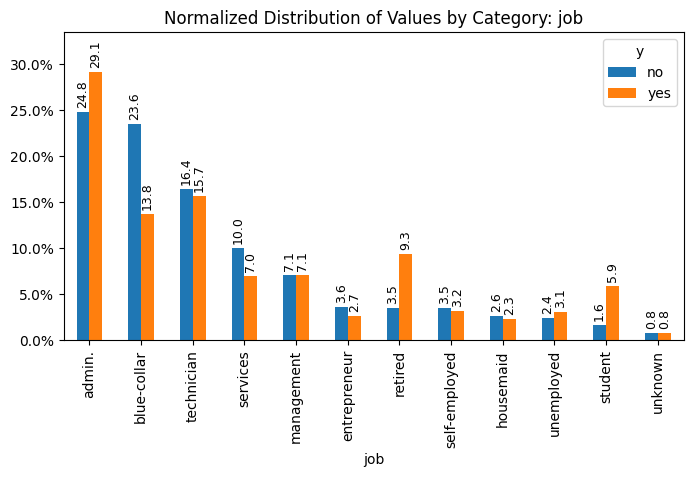

In [70]:
cat_countplot(df, 'job', 'y')

Highest proportion of subscribers (yes) is seen in:

admin. — 29.1% (the top-performing group)

retired — 9.3%

student — 5.9% (small group, but high subscription rate)

On the other hand, blue-collar and services show weaker performance:
blue-collar: only 13.8% said yes vs. 23.6% no
services: 7.0% no vs. 5.9% yes
Interpretation:

The campaign is more effective with office workers, retired people, and students.

Manual labor sectors (blue-collar) show lower conversion rates.

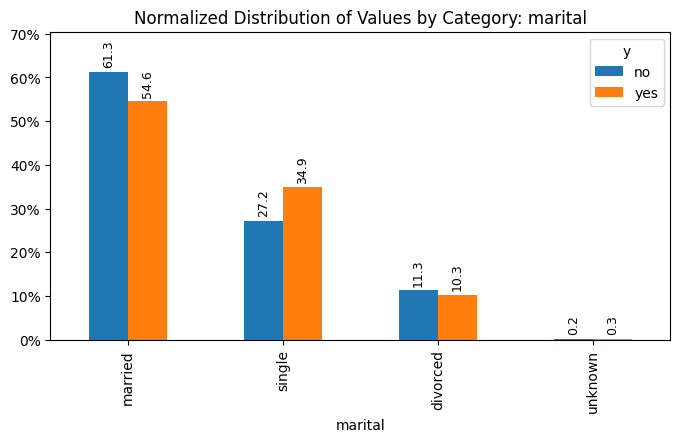

In [71]:
cat_countplot(df, 'marital', 'y')

The highest subscription rate (yes) is among single clients — 34.9%,
which is higher than their share among non-subscribers (27.2%).

Married clients are the largest group overall, but have a lower likelihood to subscribe: 54.6% (yes) vs. 61.3% (no).

Divorced group is quite balanced between yes and no.

Unknown is too rare to interpret.

This suggests that single clients are more responsive to the campaign, while married ones are more conservative.


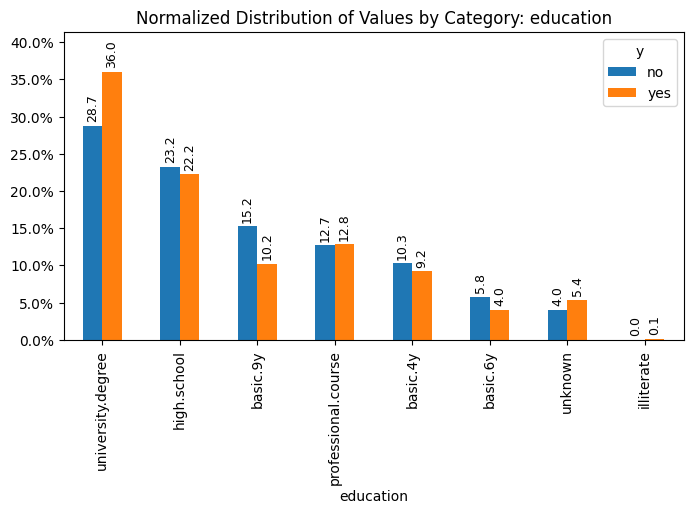

In [73]:
cat_countplot(df, 'education', 'y')

Clients with a university degree have the highest subscription rate — 36.0%, significantly above the non-subscribers (28.7%).
High school is quite balanced between yes and no.
All basic education levels show higher shares among non-subscribers — suggesting lower education is linked to lower subscription rates.
Professional course looks neutral with nearly even distribution.

This indicates that higher education is positively correlated with campaign success.

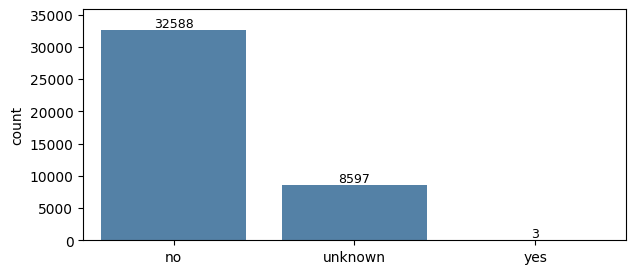

In [75]:
plt.figure(figsize=(7, 3))
ax = sns.countplot(x=df['default'], color='steelblue')
ax.bar_label(ax.containers[0], fontsize=9)
ax.margins(y=0.1)
plt.xlabel('')
plt.show()

Most clients do not have default history (no) — 32,588 entries.
A large portion is unknown — 8,597, which is about 20% of the data.
Only 3 clients are marked as yes (defaulted) — extremely rare.
📌 Conclusion: the default variable is highly imbalanced. The yes category is too rare to be useful:

Might be excluded from modeling, or
Considered for binary grouping if business logic allows (e.g., "has known credit history" vs. not).

In [82]:
df['default'] = df['default'].apply(lambda x: 'unknown' if x == 'yes' else x)

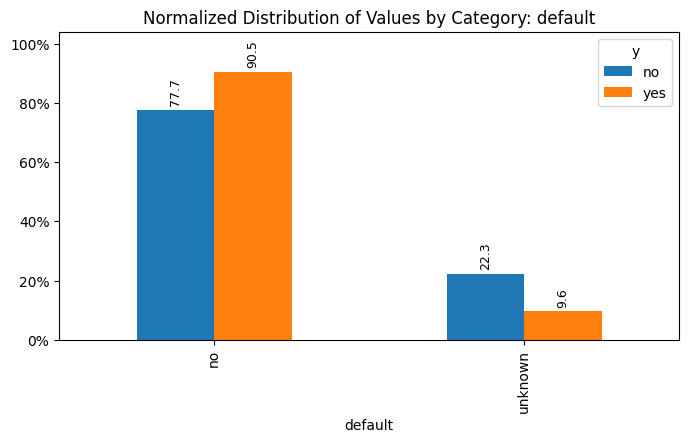

In [84]:
cat_countplot(df, 'default', 'y')

Among clients with no credit default (no), 90.5% subscribed, compared to 77.7% of non-subscribers.
For unknown, only 9.6% subscribed, while 22.3% did not.

Interpretation:
Having a confirmed “no default” status strongly correlates with higher subscription rates. Uncertainty (unknown) is associated with lower conversion.


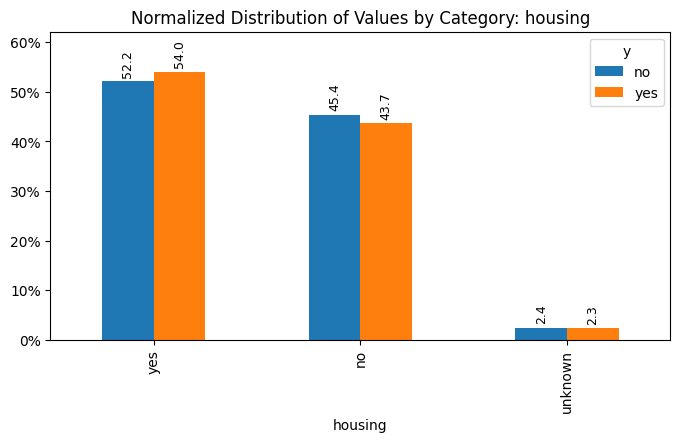

In [86]:
cat_countplot(df, 'housing', 'y')

Over half of the clients have a housing loan (yes):
52.2% among non-subscribers
54.0% among subscribers
Those without a housing loan (no) represent 43.7% of subscribers.
unknown is minimal (~2.3%) and unlikely to impact modeling.

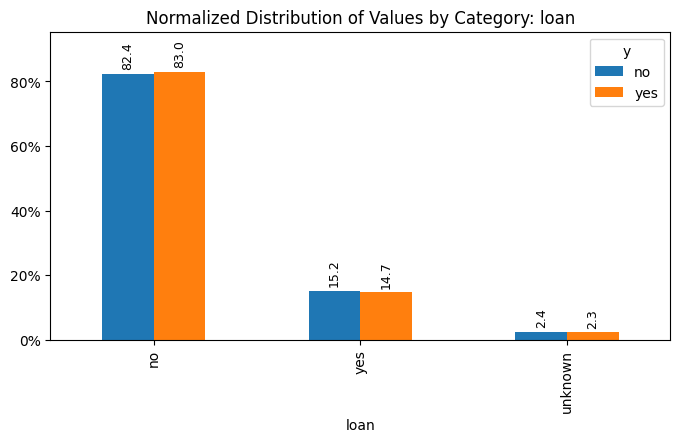

In [87]:
cat_countplot(df, 'loan', 'y')

Most clients do not have a personal loan (no):
82.4% in no
83.0% in yes

Clients with loans (yes) make up ~15% in both groups, with minimal difference.
Conclusion: Unlike housing, the loan variable shows no meaningful impact on subscription outcome — distributions are nearly identica

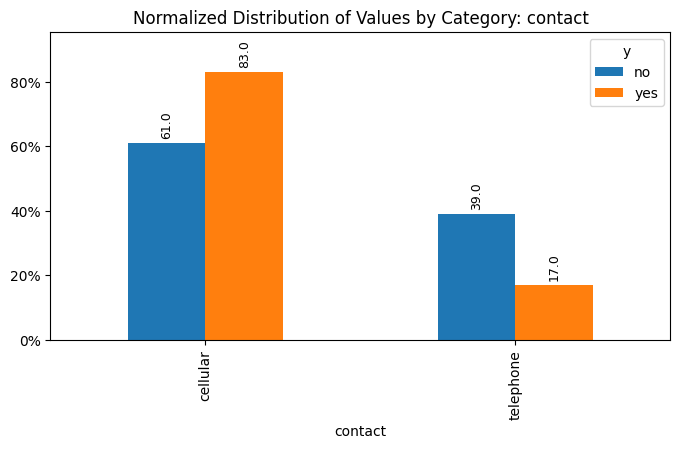

In [89]:
cat_countplot(df, 'contact', 'y')

Cellular (mobile) is the most effective contact method:
83.0% of subscribed clients were reached via mobile
vs. only 61.0% of non-subscribers
telephone (landline) is less effective:
only 17.0% of subscribers were contacted through it
39.0% of non-subscribers were reached by landline

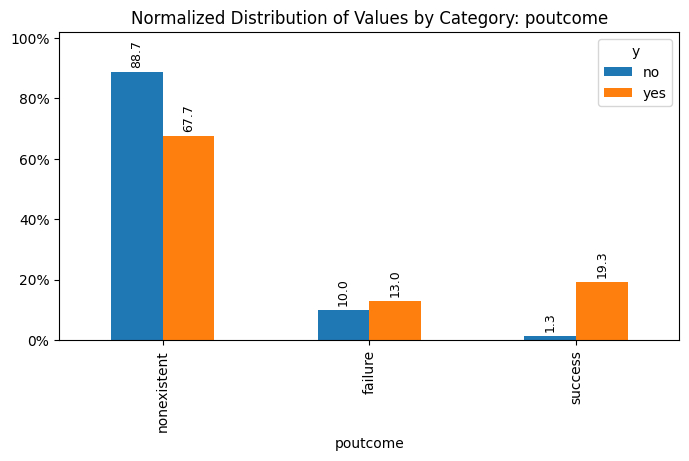

In [91]:
cat_countplot(df, 'poutcome', 'y')

Clients with success in a previous campaign are much more likely to subscribe — 19.3%, while only 1.3% of non-subscribers were from this group.
failure is balanced — 13.0% of subscribers vs. 10.0% of non-subscribers.
nonexistent dominates the dataset, but has a lower subscription rate (67.7%).
Conclusion: a successful previous campaign strongly correlates with higher subscription rates, making this a powerful predictor.

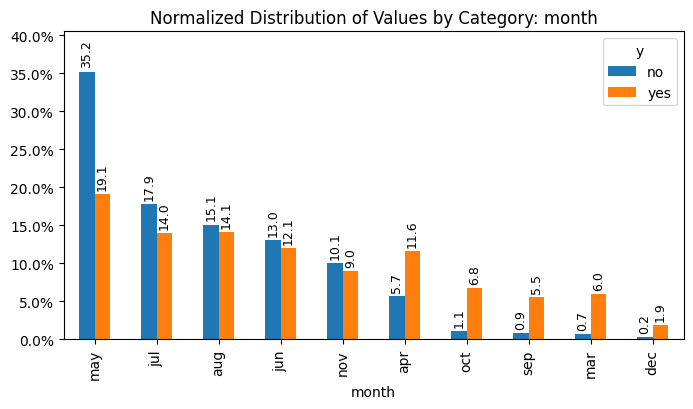

In [93]:
cat_countplot(df, 'month', 'y')

May is the most frequent month for contacts, but has lower conversion: 19.1% of subscribers vs. 35.2% non-subscribers — less effective.
Months like April, March, October, September, and December, while less represented, show higher subscription ratios:
apr: 11.6% of subscribers vs. 5.7% non-subscribers.
mar: 6.0% vs. only 0.7%.

Conclusion: High contact volume does not guarantee better results. Less saturated months tend to yield higher subscription rates.

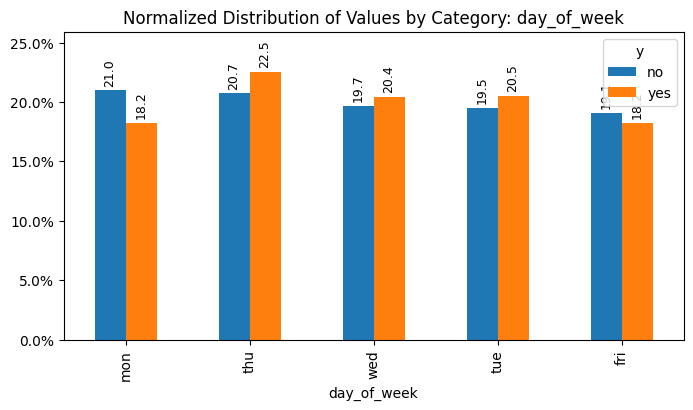

In [95]:
cat_countplot(df, 'day_of_week', 'y')

The distribution of subscriptions (yes) and rejections (no) is fairly uniform across weekdays.
Slight increase in subscriptions on Thursday (thu) — 22.5%, compared to 20.7% of non-subscribers.
Lowest subscription rates on Monday and Friday — ~18%.

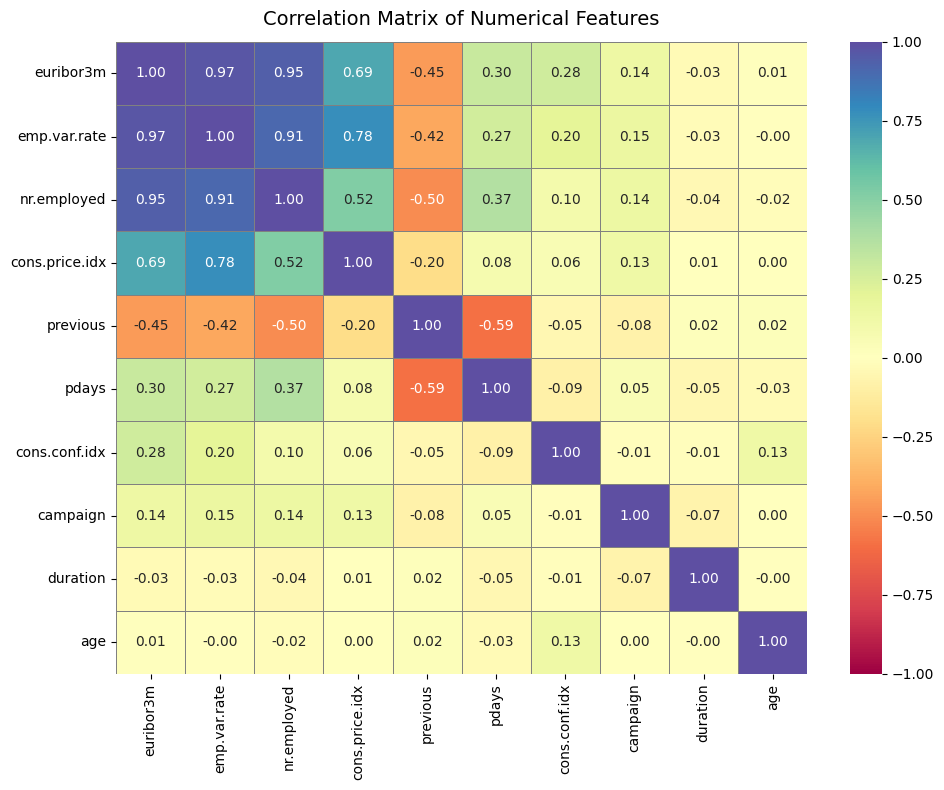

In [98]:
#Correlations
corr_matrix = df[numerical_features].corr()
ordered_features = corr_matrix.abs().sum().sort_values(ascending=False).index
corr_matrix = df[ordered_features].corr()
plt.figure(figsize=(10, 8))  # larger size
sns.heatmap(corr_matrix,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='Spectral',
            fmt='.2f',
            linewidths=0.5,
            linecolor='gray')

plt.title('Correlation Matrix of Numerical Features', fontsize=14, pad=12)
plt.tight_layout()
plt.show()

In [99]:
corr_matrix[corr_matrix<1].unstack().sort_values(key=abs, ascending=False).head(20)

euribor3m       emp.var.rate      0.972245
emp.var.rate    euribor3m         0.972245
euribor3m       nr.employed       0.945154
nr.employed     euribor3m         0.945154
emp.var.rate    nr.employed       0.906970
nr.employed     emp.var.rate      0.906970
emp.var.rate    cons.price.idx    0.775334
cons.price.idx  emp.var.rate      0.775334
                euribor3m         0.688230
euribor3m       cons.price.idx    0.688230
pdays           previous         -0.587514
previous        pdays            -0.587514
nr.employed     cons.price.idx    0.522034
cons.price.idx  nr.employed       0.522034
previous        nr.employed      -0.501333
nr.employed     previous         -0.501333
euribor3m       previous         -0.454494
previous        euribor3m        -0.454494
                emp.var.rate     -0.420489
emp.var.rate    previous         -0.420489
dtype: float64

Multicollinearity

euribor3m and emp.var.rate = 0.97

euribor3m and nr.employed = 0.95

emp.var.rate and nr.employed = 0.91

These three variables are strongly correlated. It’s advisable to keep only one of them in a predictive model to avoid multicollinearity.

Strong Negative Correlation:

previous ↔ pdays = -0.59

Explanation: Clients with high pdays values (many days since last contact) typically have previous = 0, meaning they weren’t contacted before.

Other Noteworthy Observations:

cons.price.idx has moderate correlations with a few variables (max ~0.78).

duration has almost no correlation with any other variable, making it a unique and valuable feature.
campaign is also mostly uncorrelated, contributing independent information.

Recommendations:

Remove one variable among:
euribor3m, emp.var.rate, nr.employed (since they carry very similar information).
Keep variables like duration, campaign, previous, pdays — they provide complementary and independent signals.

In [102]:
target_matrix = (
    df[numerical_features].corrwith(
        df[target_col].map({'yes': 1, 'no': 0}))
)

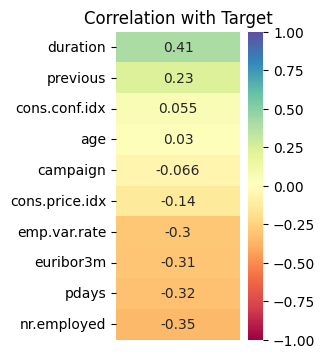

In [103]:
plt.figure(figsize=(2, 4))
plt.title('Correlation with Target')
sns.heatmap(pd.DataFrame(target_matrix).sort_values(by=0, ascending=False),
            vmin=-1,
            vmax=1,
            cmap='Spectral',
            center=0.,
            annot=True,
            xticklabels=False)
plt.show()

Top positively correlated features:

duration (0.41) The longer the call duration, the more likely the client subscribed.
Important note: duration is only known after the call, so it's not usable for prediction before the call.

previous (0.23) More previous contacts with the client increase the chance of subscription.
cons.conf.idx (0.055) and age (0.03)

Weak but positive correlation. Slight tendency: older or more confident consumers may be more likely to subscribe.

Negatively correlated features:
nr.employed (-0.35)
More employed people in the market - lower subscription rate (possibly due to economic climate).

pdays (-0.32)
Higher pdays (long time since last contact) - lower chance to subscribe.

euribor3m (-0.31) and emp.var.rate (-0.30)High interest rate or positive employment variation → fewer subscriptions (possibly optimistic economy = less need for new investments).

cons.price.idx (-0.14) Slight negative influence from consumer price index.
campaign (-0.066) More contacts in the current campaign may slightly reduce success (diminishing returns).

Insights:

duration is the strongest single indicator, but beware of data leakage.
Economic indicators like euribor3m, emp.var.rate, and nr.employed are negatively correlated, and might be strong features if properly preprocessed.
previous and pdays capture client history and show good predictive value.


In [104]:
#Multivariate analysis with target
def box(data, cat_column, continuous_column, hue_column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data,
                x=cat_column,
                y=continuous_column,
                hue=hue_column)
    plt.show()

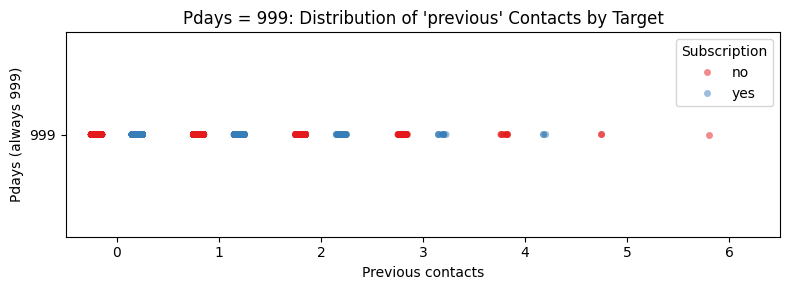

In [105]:
plt.figure(figsize=(8, 3))
sns.stripplot(data=df[df['pdays'] == 999],
              x='previous',
              y='pdays',
              hue='y',
              dodge=True,
              alpha=0.5,
              palette='Set1')
plt.title("Pdays = 999: Distribution of 'previous' Contacts by Target")
plt.yticks([999])
plt.xlabel("Previous contacts")
plt.ylabel("Pdays (always 999)")
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()


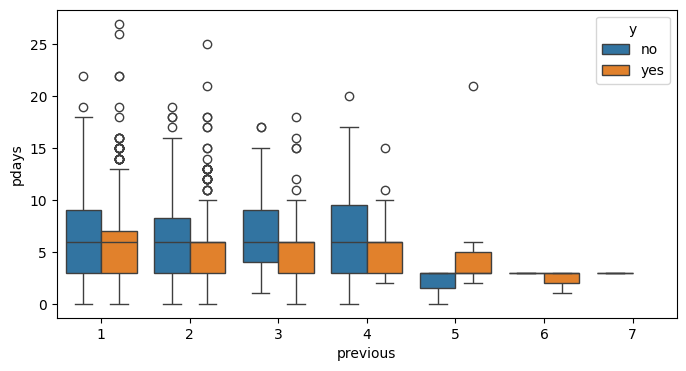

In [106]:
box(df[df['pdays'] != 999], 'previous', 'pdays', 'y')

Clients with 1 to 4 previous contacts show the most variation in pdays, especially for those who did not subscribe.

The median pdays tends to be lower for subscribers, indicating more recent contact may increase subscription likelihood.

Categories with previous > 4 contain very few observations, which explains the limited spread in those boxplots.

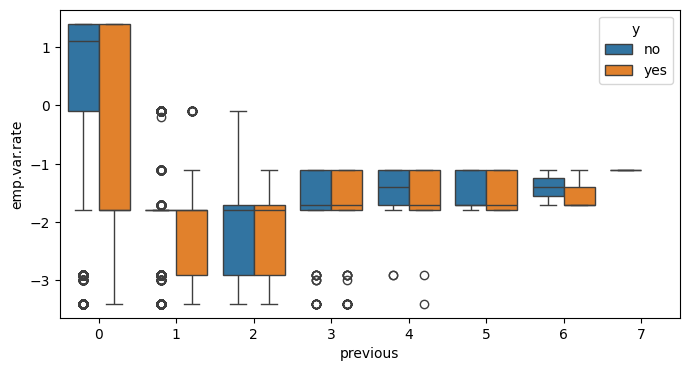

In [107]:
box(df, 'previous', 'emp.var.rate', 'y')

For clients with previous = 0, the variability in emp.var.rate is large — which is expected due to the large sample size.
From previous = 3 and higher, emp.var.rate becomes more stable, clustering around ~ -1.8.
There's no major difference in medians between subscribed and not subscribed clients across most values of previous, though non-subscribed clients show more spread.

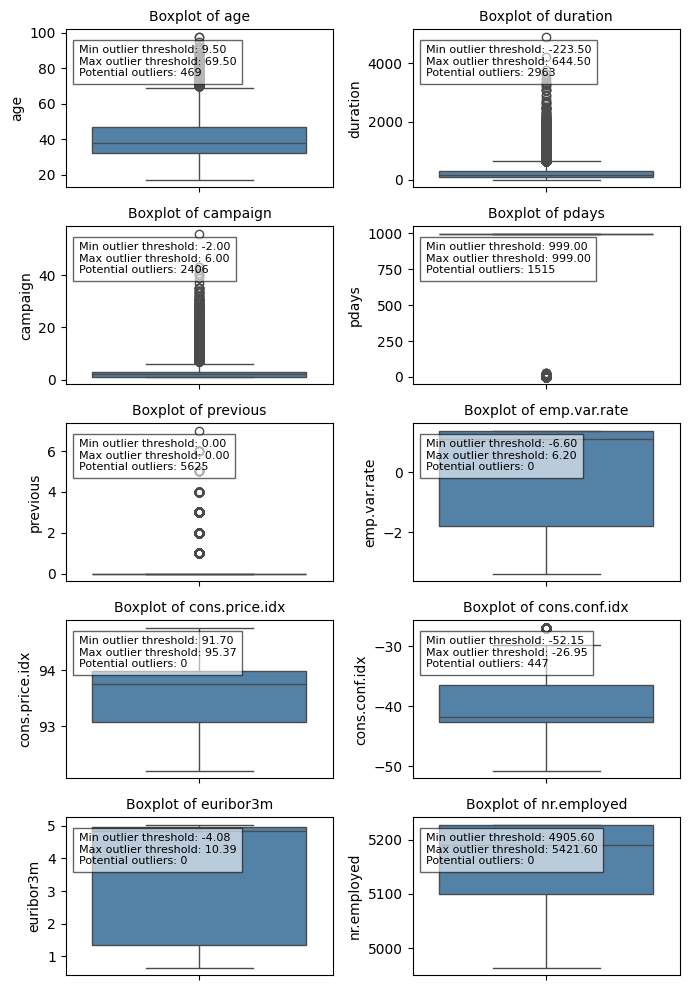

In [111]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(7, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    min_value, max_value, num_outliers = outlier_range(df, col)

    sns.boxplot(y=df[col], ax=axes[i], color='steelblue')
    axes[i].set_title(f"Boxplot of {col}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

    # Add outlier info
    text = (f"Min outlier threshold: {min_value:.2f}\n"
            f"Max outlier threshold: {max_value:.2f}\n"
            f"Potential outliers: {num_outliers}")
    axes[i].text(0.05, 0.9, text, transform=axes[i].transAxes,
                 fontsize=8, verticalalignment='top',
                 bbox=dict(facecolor='white', alpha=0.6))

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

ariables with many outliers:

duration, campaign, pdays, and previous have hundreds or thousands of potential outliers.

previous: over 5600 values above the upper threshold (all > 0).

duration: more than 2900 cases above the upper limit (644.5 seconds).
Stable variables (no or few outliers):

cons.price.idx, emp.var.rate, euribor3m, and nr.employed show no or very few outliers, suggesting they are bounded or aggregated indicators (e.g. macroeconomic values).

You may want to filter, cap, or transform the outliers in duration, campaign, pdays, and previous.
Special attention should be paid to duration:
Although it has the strongest correlation with the target, it may lead to data leakage because it’s only known after the call is made.
It’s usually excluded from training in real-world predictive modeling.

In [112]:
# Count total duplicated rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 12


In [113]:
# Display duplicate rows
df[df.duplicated()].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cons.price.idx_diff,default_grouped,y_numeric
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.000,no,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,-0.547,no,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,-0.547,no,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,-0.547,no,0
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,-0.547,no,0


In [114]:
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicates removed. New shape:", df.shape)

Duplicates removed. New shape: (41176, 24)


In [117]:
#Save
df.to_csv('/content/bank_data.csv', index=False)

Demographic and Socioeconomic Factors

Job:
retired, student, and admin. show higher subscription rates.

Education:
Clients with a university degree or professional course are more responsive.

Marital Status:
Single clients have a higher proportion of 'yes' responses compared to married or divorced.

Financial Behavior and Credit History

Default:
Clients without credit in default have a significantly higher chance to subscribe.

Housing and Personal Loan:
Having a housing or personal loan does not strongly deter subscription, but most 'yes' responses come from those without loans.

Contact-Related Factors

Contact Type:
Cellular contact is far more effective than telephone.

Previous Outcome:
Clients with a previous successful campaign outcome have the highest conversion rates.

Previous Contacts:
A low number of previous contacts (1–3) correlates with a higher subscription rate.

Economic Indicators

emp.var.rate, euribor3m, and nr.employed:
Lower values of these indicators are associated with higher subscription rates, possibly reflecting more cautious or opportunity-seeking behavior in uncertain times.

The duration variable has the highest positive correlation with the target. However, it is known after the call is completed and thus cannot be used for predictive modeling prior to the offer.